In [2]:
# Here we use the LSTM to do the work

In [3]:
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
torch.manual_seed(1)

In [70]:
EPOCH=1
BATCH_SIZE = 50
LR = 0.01
DOWNLOAD_MNIST = False

In [71]:
if not(os.path.exists('./mnist')) or not os.listdir('./mnist/'):
    DOWNLOAD_MNIST = True

In [72]:
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,
    transform = torchvision.transforms.ToTensor(), # converts a PIL.image or numpy.ndarray to torch.FloatTensfor of shape
                                                   # (C x H x W) and normalized in the range [0,1]
    download=DOWNLOAD_MNIST)

In [73]:
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=BATCH_SIZE, 
                                          shuffle=False)

torch.Size([60000, 28, 28])
torch.Size([60000])


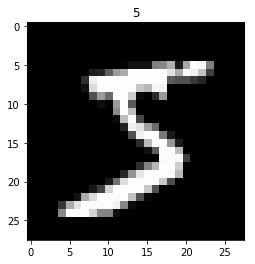

In [74]:
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[0],cmap='gray')
plt.title('%i' % train_data.train_labels[0])

# Create RNN now

In [75]:
class LSTM_T(torch.nn.Module):
    def __init__(self):
        super(LSTM_T,self).__init__()
        self.rnn = nn.LSTM(
            input_size =28,
            hidden_size = 64,
            num_layers= 1,
            batch_first=True)
        
        self.out = nn.Linear(64,10)
        #self.hidden = self.init_hidden()
        
#    def init_hidden(self):
#        h0 = Variable(torch.zeros(1, 28, 64)) 
#        c0 = Variable(torch.zeros(1, 28, 64))
#        return (h0,c0)
    
    def forward(self,x):
        
        lstm_out, _ = self.rnn(x,None)
        output = self.out(lstm_out[:,-1,:])
        return output

In [76]:
lstm=LSTM_T()

In [77]:
optimizer = torch.optim.Adam(lstm.parameters(), lr=LR)   
loss_func = nn.CrossEntropyLoss()   

In [78]:
for epoch in range(EPOCH):
    for i, (images,labels) in enumerate(train_loader):
        b_x =Variable(images.view(-1,28,28))
        b_y =Variable(labels)
        
        optimizer.zero_grad()
        output=lstm(b_x)
        loss=loss_func(output,b_y)
        loss.backward()
        optimizer.step()
        if i%100==0:
            print ('epoch [%d/%d], Iter[%d/%d] Loss:%.4f'
                  %(epoch+1,EPOCH,i+1,len(train_data)//BATCH_SIZE,loss.data[0]))

epoch [1/1], Iter[1/1200] Loss:2.3035
epoch [1/1], Iter[101/1200] Loss:0.9187
epoch [1/1], Iter[201/1200] Loss:0.5774
epoch [1/1], Iter[301/1200] Loss:0.2875
epoch [1/1], Iter[401/1200] Loss:0.5427
epoch [1/1], Iter[501/1200] Loss:0.3348
epoch [1/1], Iter[601/1200] Loss:0.2393
epoch [1/1], Iter[701/1200] Loss:0.1154
epoch [1/1], Iter[801/1200] Loss:0.2011
epoch [1/1], Iter[901/1200] Loss:0.2331
epoch [1/1], Iter[1001/1200] Loss:0.0623
epoch [1/1], Iter[1101/1200] Loss:0.0350


In [79]:
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False,transform = torchvision.transforms.ToTensor())


In [80]:
test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=BATCH_SIZE, 
                                          shuffle=False)

In [81]:
correct = 0
total = 0

for images,labels in test_loader:
    images = Variable(images.view(-1,28,28))
    outputs = lstm(images)
    _,predicited= torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=sum(predicited==labels)

print('Accuracy {} %'.format(100*correct/total))

Accuracy 94 %
